In [2]:
# 필요한 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# 1. Data 불러오기

In [3]:
# 깃허브에 업로드 된 csv 불러오기 (전처리 이전 원본 데이터)

train = pd.read_csv('https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 깃허브 불러오기 (전처리 이후 데이터)

train = pd.read_csv('https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/preprocessing_titanic_train.csv',index_col= 'Unnamed: 0')
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,2
1,2,1,1,1,1,0,71.2833,0
2,3,1,3,1,0,0,7.9250,2
3,4,1,1,1,1,0,53.1000,2
4,5,0,3,0,0,0,8.0500,2


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 62.5 KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,0.524184,0.382452,32.096681,1.535433
std,256.998173,0.486260,0.834700,0.477538,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,0.000000,0.000000,7.895800,1.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,0.000000,14.454200,2.000000
75%,668.000000,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,2.000000


# 2. Data 시각화 (column에 따른 생존)

## 2-1 생존 유무를 나타내는 countplot

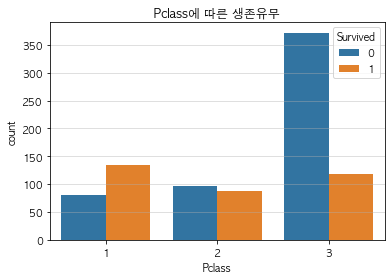

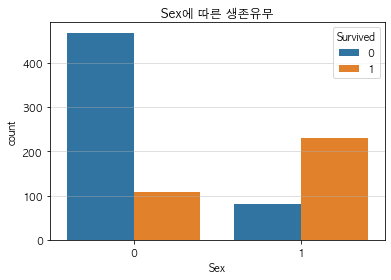

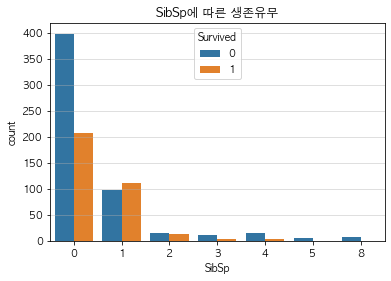

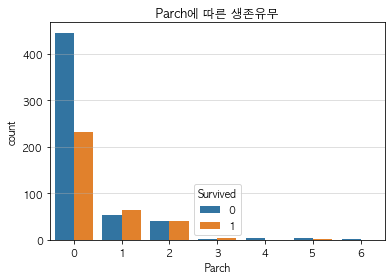

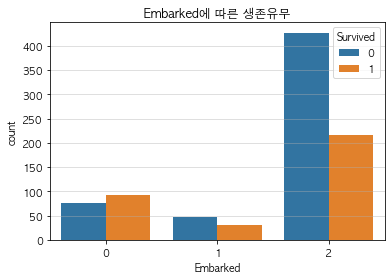

In [7]:
for i in ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked']:
    col_name = i
    sns.countplot(x=train[col_name], hue=train['Survived'])
    plt.title(f'{col_name}에 따른 생존유무')
    plt.grid(axis='y', alpha = .5)
    plt.show()

## 2-2 생존률을 나타내는 lmplot(regression을 사용)

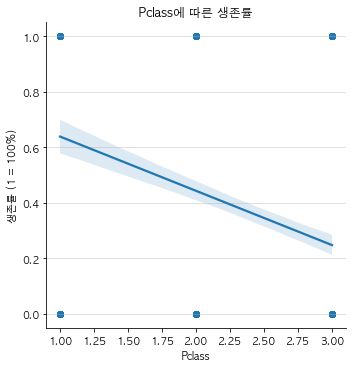

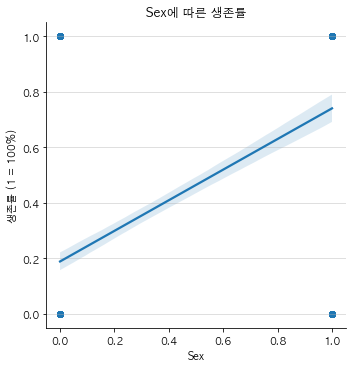

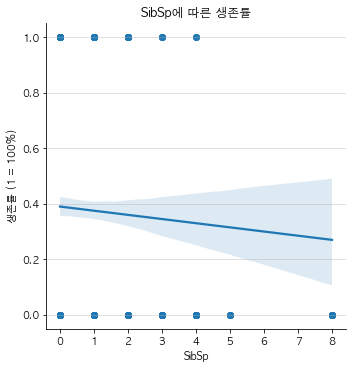

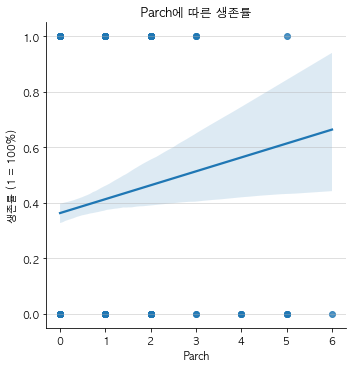

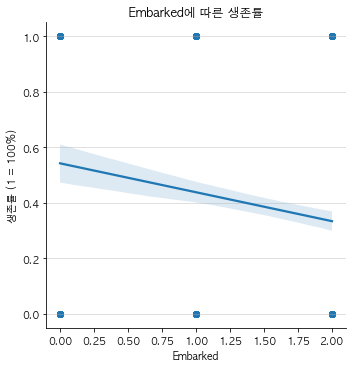

In [8]:
for i in ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked']:
    col_name = i
    sns.lmplot(x=col_name, y='Survived', data=train)
    plt.title(f'{col_name}에 따른 생존률')
    plt.ylabel('생존률 (1 = 100%)')
    plt.grid(axis='y', alpha = .5)
    plt.show()

# 3. OLS

## 3-1 더미화 작업 시행 (Pclass, Embarked)

In [9]:
feature1 = pd.get_dummies(train['Pclass'])
feature2 = pd.get_dummies(train['Embarked'])
target = train['Survived']

## 3-2 OLS 시행 (Pclass)

In [10]:
import statsmodels.api as sm

model1 = sm.OLS(target, feature1)
model1 = model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     56.77
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           6.34e-24
Time:                        12:12:26   Log-Likelihood:                -566.36
No. Observations:                 889   AIC:                             1139.
Df Residuals:                     886   BIC:                             1153.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              0.6262      0.031     19.986      0.000       0.565       0.688
2              0.4728      0.034     13.994      0.000       0.407       0.539
3              0.2424      0.021     11.717      0.000       0.202       0.283
==============================================================================
Omnibus:                     1433.725   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.727
Skew:                           0.426   Prob(JB):                     8.92e-20
Kurtosis:                       1.719   Cond. No.                         1.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
print(train['Survived'].groupby(train['Pclass']).mean())

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


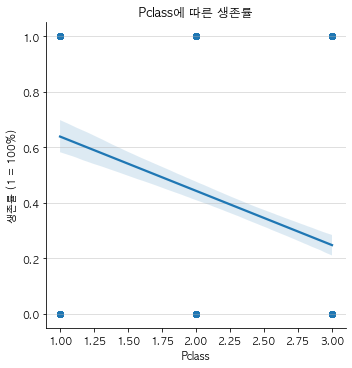

In [12]:
for i in ['Pclass']:
    col_name = i
    sns.lmplot(x=col_name, y='Survived', data=train)
    plt.title(f'{col_name}에 따른 생존률')
    plt.ylabel('생존률 (1 = 100%)')
    plt.grid(axis='y', alpha = .5)
    plt.show()

## 3-3 OLS 시행 (Embarked)

In [13]:
import statsmodels.api as sm

model2 = sm.OLS(target, feature2)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     13.61
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.51e-06
Time:                        12:12:27   Log-Likelihood:                -606.51
No. Observations:                 889   AIC:                             1219.
Df Residuals:                     886   BIC:                             1233.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.5536      0.037     14.964      0.000       0.481       0.626
1              0.3896      0.055      7.130      0.000       0.282       0.497
2              0.3370      0.019     17.833      0.000       0.300       0.374
==============================================================================
Omnibus:                     4768.382   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.479
Skew:                           0.477   Prob(JB):                     1.04e-29
Kurtosis:                       1.359   Cond. No.                         2.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
print(train['Survived'].groupby(train['Embarked']).mean())

Embarked
0    0.553571
1    0.389610
2    0.336957
Name: Survived, dtype: float64


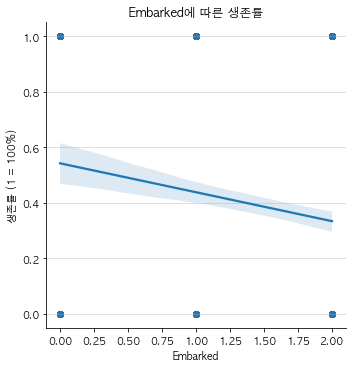

In [16]:
for i in ['Embarked']:
    col_name = i
    sns.lmplot(x=col_name, y='Survived', data=train)
    plt.title(f'{col_name}에 따른 생존률')
    plt.ylabel('생존률 (1 = 100%)')
    plt.grid(axis='y', alpha = .5)
    plt.show()